In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
from operator import itemgetter
from edog.tools import*
from edog.plot import*

filename = "params_Nr.yaml"
params = parse_parameters(filename)

nt, nr, dt, dr = itemgetter("nt", "nr", "dt", "dr")(params["grid"])
k_id, w_id, patch_diameter = itemgetter("k_id", "w_id", "patch_diameter")(params["stimulus"])
A_g, a_g, B_g, b_g = itemgetter("A", "a", "B", "b")(params["ganglion"])
w_rg, A_rg, a_rg = itemgetter("w", "A", "a")(params["relay"]["Krg"])
w_rig, A_rig, a_rig = itemgetter("w", "A", "a")(params["relay"]["Krig"])
w_rc_ex, A_rc_ex, a_rc_ex = itemgetter("w", "A", "a")(params["relay"]["Krc_ex"])
w_rc_in, A_rc_in, a_rc_in = itemgetter("w", "A", "a")(params["relay"]["Krc_in"])

w_rc_mix = itemgetter("w")(params["relay"]["Krc_mix"])
A_rc_mix_in, a_rc_mix_in = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_in"])
A_rc_mix_ex, a_rc_mix_ex = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_ex"])


size_tuning = {"fb_ex": {}, "fb_in": {}, "fb_mix": {}}

## Feedback excitation

In [2]:
tuning_curve = np.zeros([len(nr), len(w_rc_ex), len(patch_diameter)])
cen_size = np.zeros([len(nr), len(w_rc_ex)])
supp_index = np.zeros([len(nr), len(w_rc_ex)])


for j, n in enumerate(nr):
    for i, w in enumerate(w_rc_ex):
        network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=dr,
                                 A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                 w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                 w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                 w_rc_ex=w, A_rc_ex=A_rc_ex, a_rc_ex=a_rc_ex)

        angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
        wavenumber = network.integrator.spatial_angular_freqs[int(k_id)]
        spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                           angular_freq=angular_freq,
                                                           wavenumber=wavenumber,
                                                           patch_diameter=patch_diameter)

        tuning_curve[j, i, :] = spatiotemporal_tuning[0, :]

        cen_size[j, i] = rf_center_size(tuning_curve[j, i, :], patch_diameter)
        supp_index[j, i] = compute_suppression_index(tuning_curve[j, i, :])

size_tuning["fb_ex"] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

## Feedback inhibition

In [3]:
tuning_curve = np.zeros([len(nr), len(w_rc_in), len(patch_diameter)])
cen_size = np.zeros([len(nr),len(w_rc_in)])
supp_index = np.zeros([len(nr),len(w_rc_in)])

for j, n in enumerate(nr):
    for i, w in enumerate(w_rc_in):
        network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=dr,
                                 A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                 w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                 w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                 w_rc_in=w, A_rc_in=A_rc_in, a_rc_in=a_rc_in)

        angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
        wavenumber = network.integrator.spatial_angular_freqs[int(k_id)]
        spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                           angular_freq=angular_freq,
                                                           wavenumber=wavenumber,
                                                           patch_diameter=patch_diameter)

        tuning_curve[j, i, :] = spatiotemporal_tuning[0, :]

        cen_size[j, i] = rf_center_size(tuning_curve[j, i, :], patch_diameter)
        supp_index[j, i] = compute_suppression_index(tuning_curve[j, i, :])

size_tuning["fb_in"] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

## Mixed excitatory and inhibitory feedback

In [4]:
tuning_curve = np.zeros([len(nr), len(w_rc_mix), len(patch_diameter)])
cen_size = np.zeros([len(nr),len(w_rc_mix)])
supp_index = np.zeros([len(nr),len(w_rc_mix)])

for j, n in enumerate(nr):
    for i, w in enumerate(w_rc_mix):
        network = create_spatial_network(nt=nt, nr=n, dt=dt, dr=dr,
                                 A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                 w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                 w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                 w_rc_in=w, A_rc_in=A_rc_mix_in, a_rc_in=a_rc_mix_in,
                                 w_rc_ex=w, A_rc_ex=A_rc_mix_ex, a_rc_ex=a_rc_mix_ex)

        angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
        wavenumber = network.integrator.spatial_angular_freqs[int(k_id)]
        spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                           angular_freq=angular_freq,
                                                           wavenumber=wavenumber,
                                                           patch_diameter=patch_diameter)

        tuning_curve[j, i, :] = spatiotemporal_tuning[0, :]

        cen_size[j, i] = rf_center_size(tuning_curve[j, i, :], patch_diameter)
        supp_index[j, i] = compute_suppression_index(tuning_curve[j, i, :])


size_tuning["fb_mix"] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

-------------
## Convergence plots

<IPython.core.display.Javascript object>


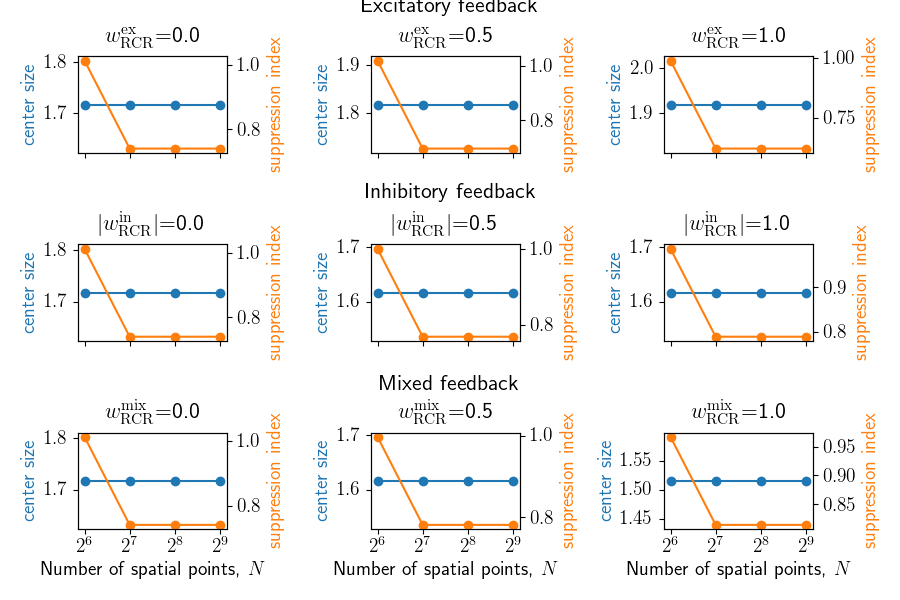

In [5]:
titles = ["Excitatory feedback", "Inhibitory feedback", "Mixed feedback"]
labels = [r"$w^\mathrm{ex}_{\mathrm{RCR}}$", r"$|w^\mathrm{in}_{\mathrm{RCR}}|$", 
          r"$w^\mathrm{mix}_{\mathrm{RCR}}$"]

fig, axarr = plt.subplots(3, 3, figsize=(9, 6), sharex="all")
plt.figtext(0.5, 0.99, titles[0], ha='center', va='center', fontsize=16)
plt.figtext(0.5, 0.68, titles[1], ha='center', va='center', fontsize=16)
plt.figtext(0.5, 0.36, titles[2], ha='center', va='center', fontsize=16)
plt.subplots_adjust(hspace=2)

# Size tuning curves:
for i, (key, w_rc) in enumerate(zip(size_tuning.keys(), [w_rc_ex, w_rc_in, w_rc_mix])):
    ax = axarr[i, :]
    
    for j, w in enumerate(w_rc):
        ax[j].set_title(labels[i]+"={}".format(w))
        ax[j].plot(2**nr, size_tuning[key]["cen_size"][:, j], "-o")
        ax[j].set_ylabel("center size", color="C0")
        ax[j].set_xscale('log', basex=2)
        
        ax_twin = ax[j].twinx()
        ax_twin.plot(2**nr, size_tuning[key]["supp_index"][:, j], "-oC1")
        ax_twin.set_ylabel("suppression index", color="C1")
        ax_twin.set_xscale('log', basex=2)
        

for ax in axarr.flat[-3:]:
    ax.set_xlabel(r"Number of spatial points, $N$")
    ax.set_xticks(2**nr)

fig.tight_layout()